### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : dash_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/dash_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,316.88,333.83,286.53,327.23,"53,928,800","2,388,710,000"
1,2017-09-04,356.94,357.21,301.84,316.13,"44,170,200","2,689,920,000"
2,2017-09-03,354.63,373.08,338.23,356.39,"34,945,200","2,670,270,000"
3,2017-09-02,393.53,395.92,329.27,350.17,"54,813,400","2,962,400,000"
4,2017-09-01,377.92,393.35,376.34,393.35,"55,440,700","2,844,110,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2017-09-05 to 2014-02-14
Data columns (total 6 columns):
Open          1300 non-null float64
High          1300 non-null float64
Low           1300 non-null float64
Close         1300 non-null float64
Volume        1300 non-null object
Market Cap    1300 non-null object
dtypes: float64(4), object(2)
memory usage: 71.1+ KB


- The data frame has 1300 entries and 6 columns. 
- All columns has 1300 elements, probably there's no missing data. Especially for Open, high, Low, and Close. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)

In [7]:
# Count missing data in each column
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.

Solution:
- Convert to float number

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [9]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2017-09-05 to 2014-02-14
Data columns (total 6 columns):
Open          1300 non-null float64
High          1300 non-null float64
Low           1300 non-null float64
Close         1300 non-null float64
Volume        1300 non-null int64
Market Cap    1300 non-null int64
dtypes: float64(4), int64(2)
memory usage: 111.1 KB


In [10]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03
mean,25.991675,27.493179,24.832110,26.235612,6.241615e+06,1.860709e+08
std,58.357573,61.685784,55.730453,58.913160,1.833914e+07,4.366053e+08
min,0.213899,0.354461,0.213899,0.314865,9.604000e+03,7.025370e+05
25%,2.550000,2.717500,2.440000,2.557500,7.173700e+04,1.409845e+07
50%,4.605000,5.095000,4.250000,4.605000,2.424410e+05,2.574805e+07
75%,11.092500,11.542500,10.542500,11.102500,1.140588e+06,7.024395e+07
max,400.420000,409.770000,376.340000,399.850000,2.674150e+08,3.009530e+09


All Data is clear

#### 3. Data Visualization

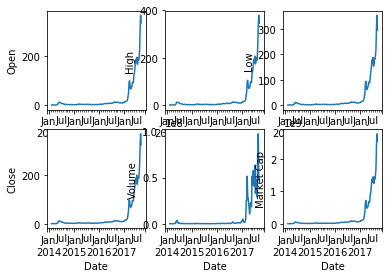

In [11]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()